In [1]:
# Import der benötigten Packages
import requests
import pandas as pd
import time

# 1. Datenset einlesen

In [69]:
df = pd.read_excel("dataset_postal_codes.xlsx")

In [70]:
# Entfernen der Datsensätze, die keine PLZ enthalten 
df = df.dropna(subset=["Was ist deine Postleitzahl?"])

In [71]:
# Konvertieren der Spalte in numerische Werte und Filtern von fehlenden Werten
df = df[pd.to_numeric(df["Was ist deine Postleitzahl?"], errors='coerce').notnull()]
df

,Zeitstempel,Stelle dir deine Lieblingspizza zusammen! Tomatensauce und Käse (wahlweise vegan) ist schon drauf!,Was ist deine Postleitzahl?,Welche Snacks dürfen für dich bei einem Filmabend mit Freunden nicht fehlen?
0,2024-04-19 12:13:34.316,"Salami, Schinken, Pilze, Zwiebeln, Ei",76137,"Chips, Popcorn (süß), Erdnüsse, M&Ms"
1,2024-04-19 12:13:45.965,"Salami, Schinken, Mais",71409,Nachos (opt. mit Käsesauce und/oder Guacamole ...
2,2024-04-19 12:15:06.288,"Mais, Paprika, Zwiebeln, Zucchini, Tomaten",70564,"Chips, Popcorn (süß), Nachos (opt. mit Käsesau..."
3,2024-04-19 12:15:46.226,"Pilze, Brokkoli, Paprika, Zwiebeln, Oliven, Au...",67059,"Chips, Nachos (opt. mit Käsesauce und/oder Gua..."
4,2024-04-19 12:16:11.702,"Schinken, Pilze, Artischocke",71384,"Chips, Nachos (opt. mit Käsesauce und/oder Gua..."
...,...,...,...,...
185,2024-04-21 19:53:10.947,"Pilze, Sardellen, Zwiebeln, Jalapenos/Peperoni...",88079,Chips
186,2024-04-21 21:59:00.104,"Artischocke, Mais",77154,"Chips, Nachos (opt. mit Käsesauce und/oder Gua..."
187,2024-04-21 22:02:48.312,"Salami, Schinken, Pilze, Artischocke",71034,"Chips, Popcorn (süß), Gummibärchen, Nachos (op..."
188,2024-04-22 18:21:19.154,"Schinken, Ananas",76185,"Popcorn (süß), Nachos (opt. mit Käsesauce und/..."


In [72]:
# Erstellen einer Liste mit allen PLZ
postal_codes = df["Was ist deine Postleitzahl?"].to_list()
postal_codes[:5]

[76137, 71409, 70564, 67059, 71384]

# 2. PLZ zu Geodaten konvertieren

In [73]:
# Import der benötigten Packages
import sqlite3

In [74]:
# Verbindung zur Datenbank mit allen deutschen PLZ herstellen
conn = sqlite3.connect('plzdatabase.db')
cursor = conn.cursor()

In [75]:
# Suche der Längen- und Breitengrade in der Datenbank
results = []
for plz in postal_codes:
    cursor.execute("SELECT Lat, Lon FROM PLZ WHERE PLZ=?",(plz,))
    result = cursor.fetchone()
    if result:
        results.append((plz, result[0], result[1]))

In [76]:
# Ergebnisse ausgeben
for result in results:
    print(f"PLZ: {result[0]}, Latitude: {result[1]}, Longitude: {result[2]}")

PLZ: 76137, Latitude: 49.0007141097442, Longitude: 8.41715198135546
PLZ: 71409, Latitude: 48.8759317576002, Longitude: 9.3513903287652
PLZ: 67059, Latitude: 49.4793356954453, Longitude: 8.43329939023741
PLZ: 71384, Latitude: 48.7995886263281, Longitude: 9.38943757453663
PLZ: 63768, Latitude: 50.0155420289223, Longitude: 9.21650761873878
PLZ: 97816, Latitude: 49.9660532460264, Longitude: 9.523622366881
PLZ: 70173, Latitude: 48.781956478822, Longitude: 9.17933033401149
PLZ: 65439, Latitude: 50.0279439492393, Longitude: 8.42071211862945
PLZ: 71679, Latitude: 48.9071490162534, Longitude: 9.14142981054416
PLZ: 77830, Latitude: 48.6774641565033, Longitude: 8.20046511310756
PLZ: 71101, Latitude: 48.6596708689765, Longitude: 9.06857901595325
PLZ: 74189, Latitude: 49.1558817288435, Longitude: 9.29986671160416
PLZ: 65510, Latitude: 50.2328523634931, Longitude: 8.24988140934341
PLZ: 74172, Latitude: 49.2001139961936, Longitude: 9.23477492172733
PLZ: 76829, Latitude: 49.221239317834, Longitude: 8.

In [77]:
# Speichern der Ergebnisse in einem df
df_coordinates = pd.DataFrame(results, columns=["Was ist deine Postleitzahl?", "Breitengrad", "Längengrad"])

In [78]:
# Entfernen aller Duplikate
df_coordinates = df_coordinates.drop_duplicates()
df_coordinates = df_coordinates.reset_index(drop=True)

In [79]:
df_coordinates

,Was ist deine Postleitzahl?,Breitengrad,Längengrad
0,76137,49.000714,8.417152
1,71409,48.875932,9.351390
2,67059,49.479336,8.433299
3,71384,48.799589,9.389438
4,63768,50.015542,9.216508
...,...,...,...
149,56332,50.254159,7.454828
150,88079,47.606171,9.601967
151,71034,48.680413,8.977926
152,76185,49.011351,8.361164


In [81]:
# Durchführung eines Joins mit der initialen df
df_geodata = pd.merge(df, df_coordinates, on="Was ist deine Postleitzahl?", how="left")

In [82]:
# Nicht gefundene PLZ (NA-Werte) aus df_geodata entfernen
df_geodata_cleaned = df_geodata.dropna(subset=["Breitengrad", "Längengrad"])
df_geodata_cleaned = df_geodata_cleaned.reset_index(drop=True)

In [83]:
# Check wieviele Einträge nicht gefunden wurden (z.B. falsche PLZ)
missing_values = len(df_geodata) - len(df_geodata_cleaned)
print("Es wurden", missing_values, "PLZ-Einträge nicht in der Datenbank gefunden")

Es wurden 8 PLZ-Einträge nicht in der Datenbank gefunden


In [85]:
# Verbindung zur Datenbank schließen
conn.close()

# 3. K-Means Clustering

In [86]:
# Import der benötigten Packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 3.1 Datenvorverarbeitung

In [87]:
# Definition von Längen- und Breitengrad als Features
df_features = df_geodata_cleaned[["Breitengrad", "Längengrad"]]
df_features.dropna(inplace=True)
df_features

C:\Users\paulm\AppData\Local\Temp\ipykernel_2504\3824328862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(inplace=True)


,Breitengrad,Längengrad
0,49.000714,8.417152
1,48.875932,9.351390
2,49.479336,8.433299
3,48.799589,9.389438
4,50.015542,9.216508
...,...,...
176,50.254159,7.454828
177,47.606171,9.601967
178,48.680413,8.977926
179,49.011351,8.361164


In [88]:
# Feature-Matrix erstellen
X = df_features.values
X[:2]

array([[49.00071411,  8.41715198],
       [48.87593176,  9.35139033]])

In [89]:
# Features skalieren (normalisieren)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3.2 Ellbow-Methode zur Ermittlung der optimalen Cluster-Anzahl

In [90]:
# Liste für Verzerrung (Summe der quadrierten Abweichungen der einzelnen Beobachtungen vom Mittelwert des Clusters)
distortions = []

In [91]:
# Anzahl von Clustern für die Elbow-Methode
clusters_range = range(1, 10)

In [92]:
# K-Means mit verschiedenen Anzahlen von Clustern ausführen
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

c:\Users\paulm\anaconda3\envs\datamining\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\paulm\anaconda3\envs\datamining\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\paulm\anaconda3\envs\datamining\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\paulm\anaconda3\envs\datamining\Lib\site-packages\sklearn\cluster\_kmeans.py:14

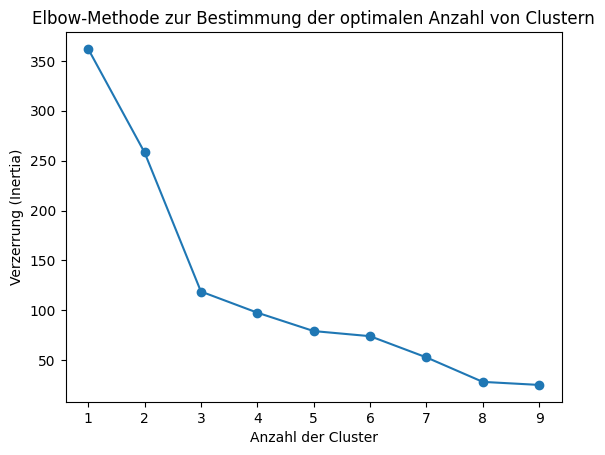

In [93]:
# Plot für die Elbow-Methode
plt.plot(clusters_range, distortions, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Verzerrung (Inertia)')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl von Clustern')
plt.show()

## 3.3 K-Means Algorithmus

In [94]:
# K-Means anwenden
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

c:\Users\paulm\anaconda3\envs\datamining\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [95]:
# Clusterzentren und Clusterzuweisungen für Visualisierung
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_) # Rückskalierung notwendig für Vergleichbarkeit mit Geodaten
cluster_labels = kmeans.labels_

In [96]:
# Definiere eine eigene Farbpalette für die Cluster
cluster_colors = ['#f27629', '#2a7db8', '#2a9c48']

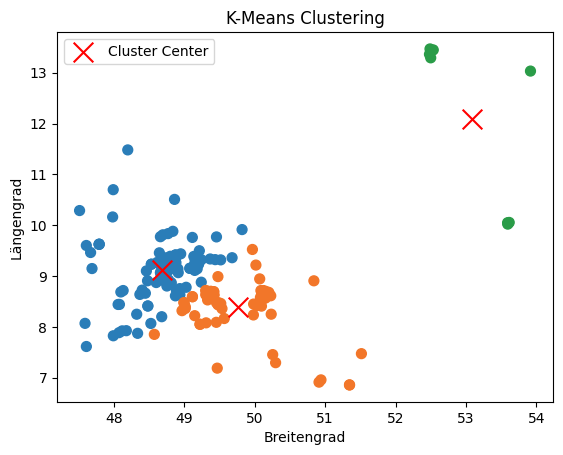

In [97]:
# Visualisierung
plt.scatter(df_features['Breitengrad'], df_features['Längengrad'], c=cluster_labels, cmap=ListedColormap(cluster_colors), s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=200, label='Cluster Center')
plt.xlabel('Breitengrad')
plt.ylabel('Längengrad')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## 3.4 Cluster auf einer Karte plotten

In [98]:
# Import der benötigten Packages
from mpl_toolkits.basemap import Basemap

In [99]:
# Bestimmung von Min und Max der Längen- und Beitengrade für Kartenskalierung
min_breitengrad = min(df_features["Breitengrad"])
max_breitengrad = max(df_features["Breitengrad"])
min_längengrad = min(df_features["Längengrad"])
max_längengrad = max(df_features["Längengrad"])

print("Min Breitengrad:", min_breitengrad)
print("Max Breitengrad:", max_breitengrad)
print("Min Längengrad:", min_längengrad)
print("Max Längengrad:", max_längengrad)

Min Breitengrad: 47.5101776804224
Max Breitengrad: 53.9169170374833
Min Längengrad: 6.85827366643173
Max Längengrad: 13.4695807779128


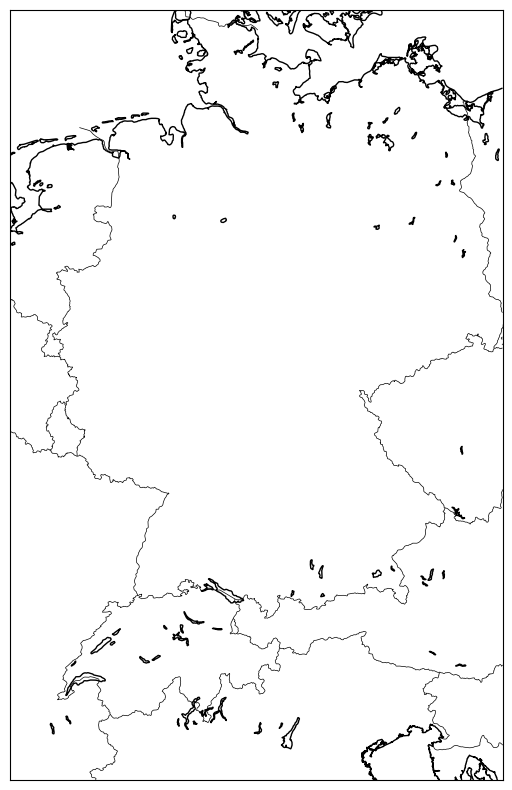

In [100]:
# Karte erstellen
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=45, urcrnrlat=55, llcrnrlon=5, urcrnrlon=15, resolution='h')
m.drawcoastlines()
m.drawcountries()

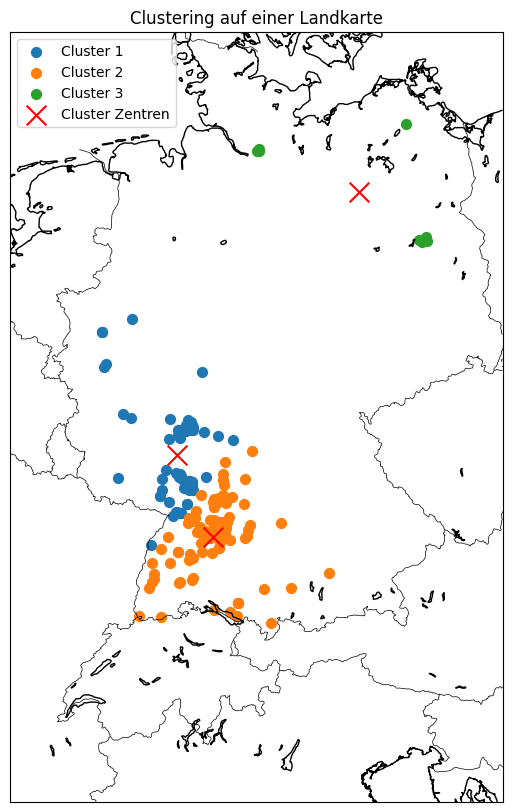

In [101]:
# Datenpunkte und Clusterzentren auf der Karte plotten
plt.figure(figsize=(10, 10))

for cluster_label in range(kmeans.n_clusters): # Iteration über alle Cluster-Labels
    cluster_data = df_features[cluster_labels == cluster_label] # Extraktion der Teilmenge aus dem df mit entsprechendem Label
    x, y = m(cluster_data['Längengrad'].values, cluster_data['Breitengrad'].values) # Transformation der Datenpunkte in Koordinaten für Karte
    m.scatter(x, y, label=f'Cluster {cluster_label+1}', marker='o', s=50) # Plot der Koordinaten

# Clusterzentren auf der Karte plotten
x_centers, y_centers = m(cluster_centers[:, 1], cluster_centers[:, 0])
m.scatter(x_centers, y_centers, color='red', marker='x', s=200, label='Cluster Zentren')

m.drawcoastlines()
m.drawcountries()

plt.title('Clustering auf einer Landkarte')
plt.legend()
plt.show()

## 3.5 Evaluation

In [102]:
# Import der benötigten Packages
from sklearn.metrics import silhouette_score

In [103]:
# Berechnung des Silhouette Scores (>0 --> gute Clustertrennung)
silhouette_avg = silhouette_score(X, cluster_labels)
print("Der durchschnittliche Silhouette Score beträgt:", silhouette_avg)

Der durchschnittliche Silhouette Score beträgt: 0.3958822708981048


# 4. Self Organizing Neural Network (SONN)

In [104]:
# Import der benötigten Packages
from minisom import MiniSom
import numpy as np

## 4.1 SONN Algorithmus (MiniSom)

In [105]:
# Größe des Kohonen-Netzwerks = 3x3
# Dimesionalität = 2
# Sigma (Bestimmung der Nachbarschaftsfunktion (niedrig = kleiner Bereich um Gewinnerneuron, hoch = großer Bereich)) = 2
# Lernrate (Anpassung der Gewichte) = 0.2
som = MiniSom(3, 3, 2, sigma=2, learning_rate=0.2)

In [109]:
# Modell trainieren
som.train_random(X_scaled, 10000)

In [110]:
# Zuordnung jedes Datenpunkts zu einem Cluster berechnen
cluster_labels_sonn = np.array([som.winner(x) for x in X_scaled])

In [111]:
# Anzahl an Clustern ausgeben
unique_labels = np.unique(cluster_labels_sonn)
num_unique_labels = len(unique_labels)
print("Anzahl der einzigartigen Cluster-Labels:", num_unique_labels)

Anzahl der einzigartigen Cluster-Labels: 3


In [112]:
# 2-Dimsionales-Cluster-Array auf 1-Dimensionales-Cluster Array reduzieren
cluster_labels_sonn_flat = cluster_labels_sonn.flatten()
cluster_labels_sonn_flat[:5]


array([2, 2, 0, 2, 2], dtype=int64)

## 4.2 Label Map zeichnen und Karte plotten

In [113]:
from matplotlib import colors

In [114]:
# Funktion zur Erstellung der Label-Map
def create_label_map(som, X_scaled):
    num_rows, num_cols = som.get_weights().shape[0:2]
    label_map = np.zeros(shape=(num_rows, num_cols), dtype=np.int64)
    for i, x in enumerate(X_scaled):
        winner = som.winner(x) # Gewinnerneuron (BMU) für Datenpunkt wird identifiziert
        label_map[winner] = cluster_labels_sonn_flat[i] # Clusterlabel des Datenpunkts wird dem Gewinnerneuron in der Label Map zugeordnet
    return label_map

In [115]:
# Erstelle die Label-Map
label_map = create_label_map(som, X_scaled)

In [116]:
# Titel für die Visualisierung
title = 'Label Map'

# Farbkarte definieren
cmap = colors.ListedColormap(['#f27629', '#2a7db8', '#2a9c48'])

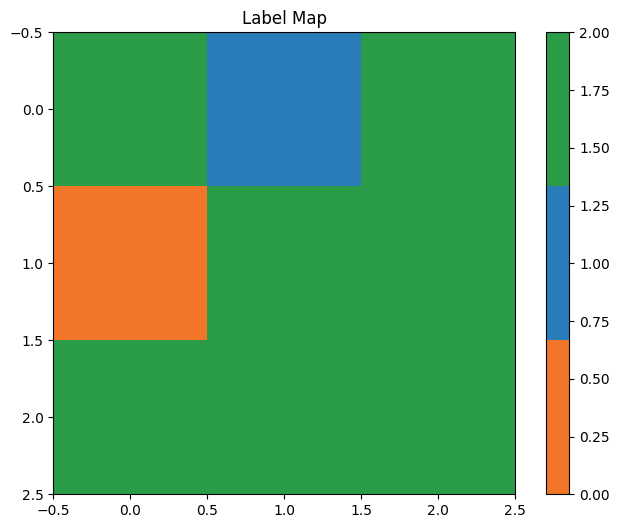

In [117]:
# Karte anzeigen
plt.figure(figsize=(8, 6))
plt.imshow(label_map, cmap=cmap, interpolation='nearest')
plt.colorbar()
plt.title(title)
plt.show()

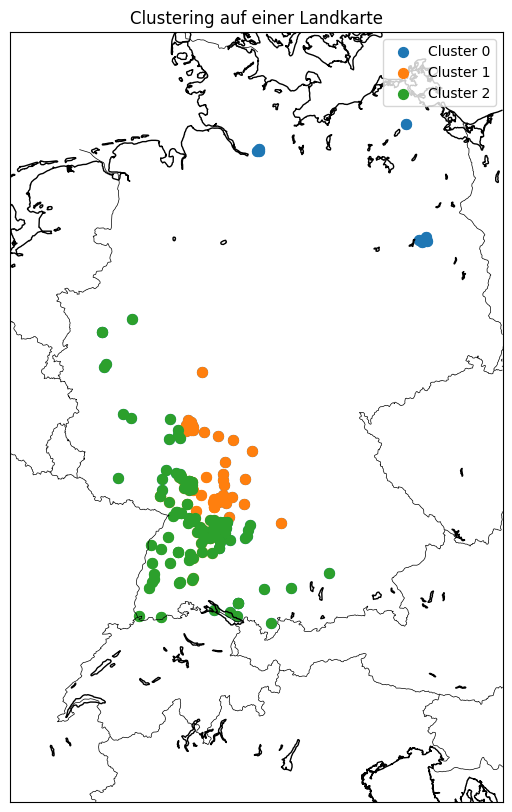

In [118]:
# Datenpunkte auf der Karte plotten
plt.figure(figsize=(10, 10))

for cluster_label in np.unique(cluster_labels_sonn): # Iteration über alle Cluster-Labels
    cluster_data = df_features[cluster_labels_sonn == cluster_label] # Extraktion der Teilmenge aus dem df mit entsprechendem Label
    x, y = m(cluster_data['Längengrad'].values, cluster_data['Breitengrad'].values) # Transformation der Datenpunkte in Koordinaten für Karte
    m.scatter(x, y, label=f'Cluster {cluster_label}', marker='o', s=50) # Plot der Koordinaten

m.drawcoastlines()
m.drawcountries()

plt.title('Clustering auf einer Landkarte')
plt.legend()
plt.show()

## 4.3 Evaluation

In [119]:
# Berechnung des Quantifizierungsfehlers
def quantization_error(som, X_scaled):
    # Berechnung des Gewinnerneurons für jeden Datenpunkt
    winners = np.array([som.winner(x) for x in X_scaled])
    
    # Extrahieren der Gewichtsvektoren der Gewinnerneuronen
    win_weights = som._weights[winners[:, 0], winners[:, 1]]
    
    # Berechnung der Distanz zwischen jedem Datenpunkt und seinem Gewinnerneuron
    distances = np.linalg.norm(X_scaled - win_weights, axis=1)
    
    # Berechnung des durchschnittlichen Quantisierungsfehlers
    quant_error = np.mean(distances)
    
    return quant_error

In [120]:
# Im Durchscnitt sind Datenpunkte um 0.534 Datenpunkte von Gewinnerneuronen entfernt (je kleiner desto besser)
quant_error = quantization_error(som, X_scaled)
print("Quantisierungsfehler:", quant_error)

Quantisierungsfehler: 0.5347352830629226
